# Compressed sensing: a simple example

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model as linear_model

First, we generate the matrix $U$ corresponding to the dictionary of Haar wavelets.

same as last week :)

In [2]:
def haarMatrix(n):
    if n > 2:
        h = haarMatrix(n / 2)
    else:
        return np.array([[1, 1], [1, -1]])

    # calculate upper haar part
    h_n = np.kron(h, [1, 1])
    
    # calculate lower haar part 
    h_i = np.sqrt(n/2)*np.kron(np.eye(len(h)), [1, -1])

    # combine parts
    h = np.vstack((h_n, h_i))
    return h

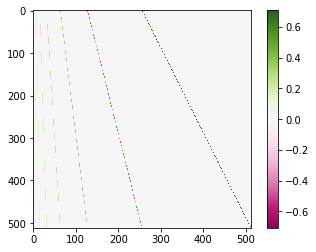

In [3]:
D = 512 #size of the dictionary. MUST be a power of 2.
U = np.transpose(haarMatrix(D)/np.sqrt(D)) #computing dictionary matrix. 
plt.imshow(U, cmap='PiYG', interpolation='nearest')
plt.colorbar()
plt.show()

**TASK A** : generate a random signal $x = Uz$ for some $z$ s.t. $\|z\|_0\ll D$ and project it to $M\ll D$ random directions, which you encode in a matrix $W$. Call the resulting vector $Wx =: y\in\mathbb{R}^M$ as in the lecture. Plot $x,z,y$.

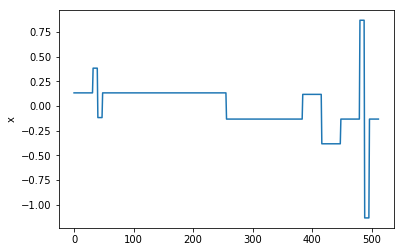

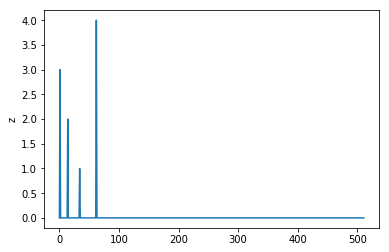

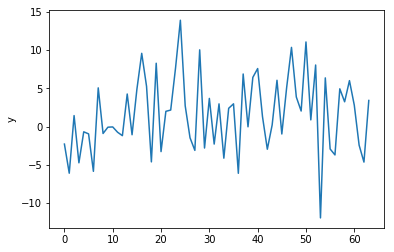

In [4]:
#generating the sparse signal
z = np.zeros((D,)) 
z[1] = 3
z[int(D/8)-2] = 4
z[int(D/32)-2] = 2
z[int(D/16)+2] = 1
x = np.dot(U,z)

#doing the random projection
M = 64
W = np.random.randn(M,D)
y = np.dot(W,x) # random projection


#plotting
plt.plot(x)
plt.ylabel('x')
plt.figure()
plt.plot(np.dot(np.transpose(U),x))
plt.ylabel('z')
plt.figure()
plt.plot(y)
plt.ylabel('y')
plt.show()

**TASK B** : generate the matrix $\Theta = W U$ you saw in the lecture. 

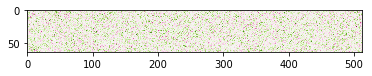

In [5]:
#plotting Theta
Theta = np.dot(W,U)
plt.imshow(Theta, cmap='PiYG', interpolation='nearest')
plt.show()

**TASK C** : We have that $y = \Theta z$ and we want to solve for $z$. Is the solution unique?

Solve the problem using linear least squares, that is
$$\hat z_{LS} = \text{argmin}_{z} \|y - \Theta z\|^2,$$

and compare $\hat z_{LS}$ to $z$. What do you notice? How is the signal reconstruction?

*HINT : check documentation at* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

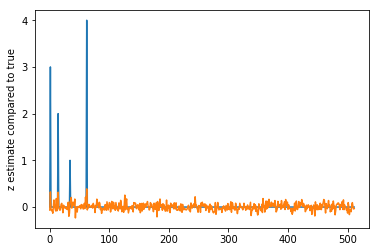

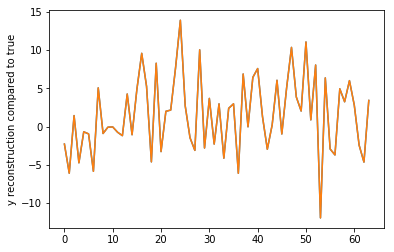

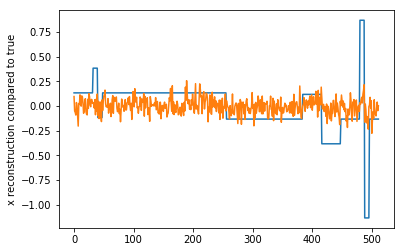

In [6]:
#fitting the model, plotting the result
model = linear_model.LinearRegression(fit_intercept=False)
z_est_LS = model.fit(Theta, y).coef_
plt.plot(np.dot(np.transpose(U),x))
plt.plot(z_est_LS)
plt.ylabel('z estimate compared to true')
plt.show()
plt.figure()
plt.plot(y)
plt.plot(np.dot(Theta,z_est_LS))
plt.ylabel('y reconstruction compared to true')
plt.show()
plt.plot(x)
plt.plot(np.dot(U,z_est_LS))
plt.ylabel('x reconstruction compared to true')
plt.show()

**TASK D** : Get a better solution by solving a different (regularized) optimization problem. Compare the result with the groud truth and reconstruct the signal $x$. 

Comment your solution, why is this better? How does the solution change by changing the regularizer power?
    
*HINT : induce sparsity.. remember basic statistics!*

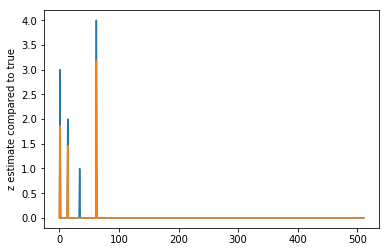

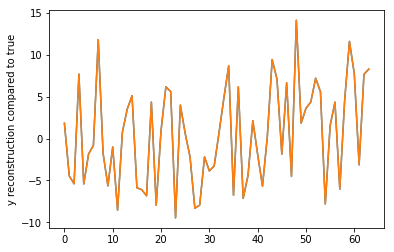

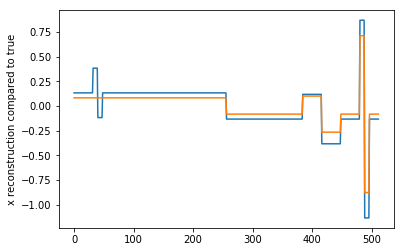

In [9]:
#fitting the model, plotting the result
model = linear_model.Lasso(alpha=1, fit_intercept=False)
z_est_LASSO = model.fit(Theta, y).coef_
plt.plot(np.dot(np.transpose(U),x))
plt.plot(z_est_LASSO)
plt.ylabel('z estimate compared to true')
plt.show()
plt.figure()
plt.plot(y)
plt.plot(np.dot(Theta,z_est_LS))
plt.ylabel('y reconstruction compared to true')
plt.show()
plt.plot(x)
plt.plot(np.dot(U,z_est_LASSO))
plt.ylabel('x reconstruction compared to true')
plt.show()
